In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from msc_filtering import MyKalmanFilterUnivariate

## Some theory

#### Standard kalman filter

The discrete state-space process model defines the evolution of the state from time k−1 to time k  as:

$x_k=Fx_{k−1}+Bu_{k−1}+w_{k−1}$

$x$: state vector <br> 
$F$: state transition matrix <br> 
$u$: control vector <br> 
$B$: control-input matrix <br> 
$w$: process noise vector $w \sim N(0,Q)$ 

The measurement/observation model describes the relationship between the state and the measurement at the current time step $k$

$z_k=Hx_{k}+{\upsilon}_k$


$z$: measurement vector <br> 
$H$: measurement matrix <br> 
$\upsilon$: measurement noise vector $\upsilon \sim N(0,R)$ 

$F$ is a discretised process which can be found from a continous linear first order state space model using the infinite sum. If you take a differential equation and discretize it in order to solve it numerically you will end up with a difference equations (difference between two consecutive values - can use to create a corresponding recursive equation) 

$\dot{x} = A \cdot x $

Using:
$e^x= 1 + \sum_{i=1}^{\infty}\frac{x^i}{i!} $

$F_t = e^{{\Delta}tA} = I + \sum_{i=1}^{\infty}\frac{{\Delta}t^iA^i}{i!} $ Where $I$ is the identity

#### Extended Kalman filter

For a nonlinear dynamic system - one is not able to define either or both the process model or measurement model with multiplication of vectors and matrices. In an EKF we linearize the models about a current estimate using a Taylor series.

## Test Kalman filtering

####  Constant with constant model

Water tank with constant level at L=1

Define kalman filter params

In [8]:
x0 = 0  # Initial value - arbitrary guess
p0 = 1000  # State covariances (Error of estimation) - High since unknown
Q = 0.0001  # System noise
R = 0.1  # Measurement noise

Instantiate filter

In [9]:
testFilter_const = MyKalmanFilterUnivariate(x0, p0, R, Q)

Evaluate against synthetic data

In [10]:
%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.9, 0.8, 1.1, 1, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]
for measure in measure_list:
    testFilter_const.step(measure);
    xt_intr_list.append(testFilter_const.xt_intr)
    Pt_intr_list.append(testFilter_const.Pt_intr)
    k_gain_list.append(testFilter_const.k_gain)
    xt_curr_list.append(testFilter_const.xt_curr)
    Pt_curr_list.append(testFilter_const.Pt_curr)

Check results

In [11]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_level = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [12]:
df_level

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,0.000000,1000.000100,0.999900,0.899910,0.099990
1,0.899910,0.100090,0.500225,0.849933,0.050022
2,0.849933,0.050122,0.333877,0.933424,0.033388
3,0.933424,0.033488,0.250867,0.950126,0.025087
4,0.950126,0.025187,0.201193,0.950101,0.020119
5,0.950101,0.020219,0.168187,0.966902,0.016819
6,0.966902,0.016919,0.144705,1.000633,0.014470
7,1.000633,0.014570,0.127175,0.987835,0.012717
8,0.987835,0.012817,0.113613,0.972175,0.011361
9,0.972175,0.011461,0.102827,0.990460,0.010283


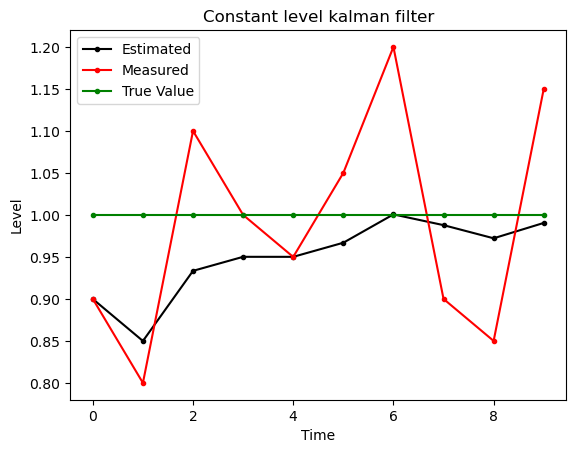

In [13]:
plt.plot(df_level.index, df_level['xt_curr'] ,marker=".",color="black")
plt.plot(df_level.index, measure_list ,marker=".",color="red")
plt.plot(df_level.index, np.ones(len(df_level.index)) ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()

#### Constant increasing with constant model

Water tank with constant filling at 0.1

In [14]:
rising_level = 0
gt_level = []

steps = 6
for _ in range(steps):
    rising_level = rising_level + 0.1
    gt_level.append(rising_level)

In [15]:
gt_level

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6]

Define kalman filter params

In [22]:
x0 = 0  # Initial value - arbitrary guess
p0 = 1000  # State covariances (Error of estimation) - High since unknown
Q = 0.001  # System noise
R = 0.1  # Measurement noise

Instantiate filter

In [23]:
testFilter_rising = MyKalmanFilterUnivariate(x0, p0, R, Q)

Evaluate against synthetic data

In [24]:
%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.11, 0.29, 0.32, 0.5, 0.58, 0.54]
for measure in measure_list:
    testFilter_rising.step(measure);
    
    # Record time steps    
    xt_intr_list.append(testFilter_rising.xt_intr)
    Pt_intr_list.append(testFilter_rising.Pt_intr)
    k_gain_list.append(testFilter_rising.k_gain)
    xt_curr_list.append(testFilter_rising.xt_curr)
    Pt_curr_list.append(testFilter_rising.Pt_curr)

Check results

In [25]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_rising_level = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [26]:
df_rising_level

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,0.000000,1001.000000,0.999900,0.109989,0.099990
1,0.109989,1.099990,0.916666,0.274999,0.091667
2,0.274999,1.091667,0.916084,0.316224,0.091608
3,0.316224,1.091608,0.916080,0.484577,0.091608
4,0.484577,1.091608,0.916080,0.571992,0.091608
5,0.571992,1.091608,0.916080,0.542685,0.091608


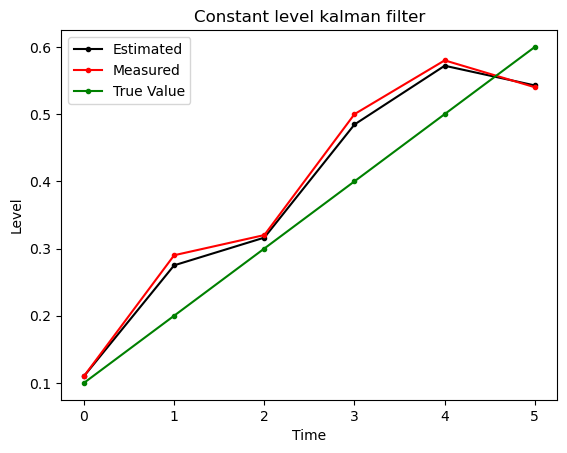

In [27]:
plt.plot(df_rising_level.index, df_rising_level['xt_curr'] ,marker=".",color="black")
plt.plot(df_rising_level.index, measure_list ,marker=".",color="red")
plt.plot(df_rising_level.index, gt_level ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()

#### Constant increasing with constant increasing model

In [ ]:
Ft = np.array([[1, 1], [0, 1]])
Q = np.array([[q/3,q/2],[q/2,q]])

In [ ]:
H = np.array([1, 0])
y = np.array([y,0])

In [ ]:
P = np.array([[pl, plf],[plf,pf]])